In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

treemetric_data = pd.read_csv("treedata.csv", 
                               index_col="id")

In [ ]:
remove_stump_mask = treemetric_data['scientific_name'] == 'Stump'
treemetric_data[remove_stump_mask]

In [81]:
tree_condition_good = treemetric_data['condition'] == 'Good'
treemetric_data[tree_condition_good]

,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,diameter_base_height,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,,
1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,38.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
1333224197,5550,BRYANT ST,Oak: Pin,Quercus palustris,45.0,18.0,35.0,3.0,Tree Lawn or Parkway,21.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.477496,-79.924568
239290336,5503,BRYANT ST,Dogwood: Corneliancherry,Cornus mas,8.0,4.0,99.0,3.0,Tree Lawn or Parkway,2.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478403,-79.925985
1233652274,1207,KING AVE,Maple: Norway,Acer platanoides,27.0,10.0,30.0,3.0,Tree Lawn or Parkway,13.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478404,-79.926126
1477030894,1201,KING AVE,Maple: Norway,Acer platanoides,35.0,12.0,3.0,3.0,Well or Pit,18.0,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478314,-79.926161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131523343,NaN,NaN,Linden: Littleleaf,Tilia cordata,NaN,NaN,NaN,NaN,NaN,15.0,...,Westwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-18,40.436222,-80.053030
1827907131,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,5.0,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443065,-79.934139
1513723611,NaN,NaN,Maple: Sugar,Acer saccharum,NaN,NaN,NaN,NaN,NaN,5.0,...,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.443010,-79.934095


In [ ]:
tree_condition_good = treemetric_data['condition'] == 'Fair'
treemetric_data[tree_condition_good]

In [ ]:
tree_condition_good = treemetric_data['condition'] == 'Poor'
treemetric_data[tree_condition_good]

Text(0.5, 1.0, 'Conditions of trees in Pittsburgh')

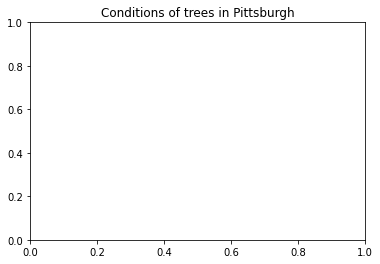

In [80]:
plt.title("Conditions of trees in Pittsburgh")